## Introduction to pandas

In [1]:
import pandas as pd

In [2]:
# 2 main datatypes
# Series = 1 dimentional
series = pd.Series(["BMW", "Toyota", "Honda"])
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [3]:
colors = pd.Series(["Red","Black","Blue"])
colors

0      Red
1    Black
2     Blue
dtype: object

In [4]:
# DataFrame = 2-dimentional and more common
car_data = pd.DataFrame({"Car_make":series, "Color":colors})
car_data


,Car_make,Color
0,BMW,Red
1,Toyota,Black
2,Honda,Blue


In [5]:
#Import data into dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [6]:
#exporting data as csv
#canalso be exported as excel directly
#car_sales.to_excel("file_name")

car_sales.to_csv("exported-car-sales.csv", index = False)

## Describe Data

In [7]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [8]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [9]:
car_columns = car_sales.columns
car_columns


Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [10]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [11]:
#works only on numeric data
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [12]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [13]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

## Selecting and viewing data

In [14]:
#returns first 5 rows of data by default
#car_sales.head(number of rows ypu want)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [15]:
#car_sales.tail(number of rows from the end)
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [16]:
#.loc .iloc
animals = pd.Series(["cat","dog","panda","snakes","lion","Tiger"],
                    index=[0,8,6,8,5,3]) 
animals

0       cat
8       dog
6     panda
8    snakes
5      lion
3     Tiger
dtype: object

In [17]:
#.loc refers to index
animals.loc[8]

8       dog
8    snakes
dtype: object

In [18]:
#.iloc refers to position
animals.iloc[3]

'snakes'

In [19]:
#loc and iloc also support slicing
print("-----loc------")
car_sales.loc[:3]

-----loc------


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [20]:
print("---------.iloc------")
car_sales.iloc[:3]

---------.iloc------


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [21]:
# To select a particular columns
#car_sales["Make"]  or 

In [22]:
# The same as the previous but this method will not work if column names have a space in them
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [23]:
# Select a row with some filter
#eg: car_sales[car_sales["odometer (km)"] > 10000]

car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [24]:
pd.crosstab(car_sales["Make"],car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [25]:
#Groupby
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


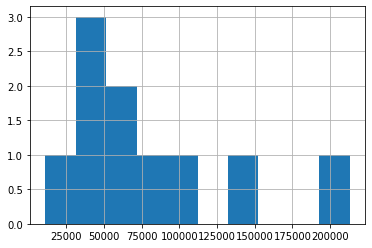

In [26]:
car_sales["Odometer (KM)"].hist()

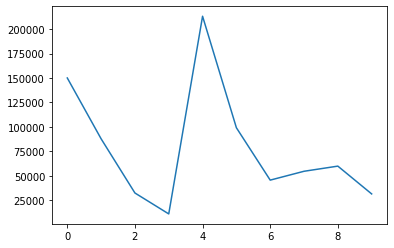

In [27]:
car_sales["Odometer (KM)"].plot()

In [28]:
#conc=verting the Price column to int type
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','').astype(int) 

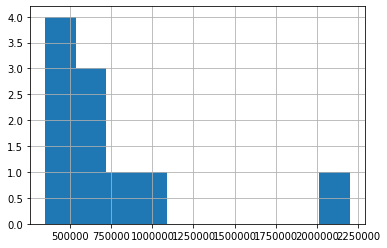

In [29]:
car_sales["Price"].hist()

In [30]:
car_sales["Price"] = car_sales.Price / 100

In [31]:
car_sales.Price

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

In [32]:
car_sales.Price = car_sales.Price.astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


## Manipulating Data 

In [33]:
car_sales.Make.str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [34]:
car_sales_missing = pd.read_csv("F:\zero-to-mastery-ml\data\car-sales-missing-data.csv")

In [35]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [36]:
#Inplace is by default False
#inplace can be used to make changes to the column in the dataframe without having to reassign
# example-> car_sasles_missing.Odometer = car_sales_missing.Odometer.fillna(0) can be done as follows
car_sales_missing.Odometer.fillna(00,inplace=True)

In [37]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,0.0,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,0.0,4.0,"$4,500"
6,Honda,NaN,0.0,4.0,"$7,500"
7,Honda,Blue,0.0,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [38]:
# to delete all rows with Nan values
car_sales_missing.dropna() #use inplace=True if u want to affect the data frame
#create a new copy of the dataframewith dropped values
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,0.0,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,0.0,4.0,"$4,500"


In [39]:
#creating a new column from series
seats_column = pd.Series([5,5,5,])
#pandas adds new column to the right of the table
car_sales["Seats"] = seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000,5.0
1,Honda,Red,87899,4,5000,5.0
2,Toyota,Blue,32549,3,7000,5.0
3,BMW,Black,11179,5,22000,NaN
4,Nissan,White,213095,4,3500,NaN
5,Toyota,Green,99213,4,4500,NaN
6,Honda,Blue,45698,4,7500,NaN
7,Honda,Blue,54738,4,7000,NaN
8,Toyota,White,60000,4,6250,NaN
9,Nissan,White,31600,4,9700,NaN


In [40]:
car_sales.fillna(5,inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000,5.0
1,Honda,Red,87899,4,5000,5.0
2,Toyota,Blue,32549,3,7000,5.0
3,BMW,Black,11179,5,22000,5.0
4,Nissan,White,213095,4,3500,5.0
5,Toyota,Green,99213,4,4500,5.0
6,Honda,Blue,45698,4,7500,5.0
7,Honda,Blue,54738,4,7000,5.0
8,Toyota,White,60000,4,6250,5.0
9,Nissan,White,31600,4,9700,5.0


In [41]:
# creating column from list
# the list has to be the same length as the number of rows in the dataset
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales["Fuel_economy"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy
0,Toyota,White,150043,4,4000,5.0,7.5
1,Honda,Red,87899,4,5000,5.0,9.2
2,Toyota,Blue,32549,3,7000,5.0,5.0
3,BMW,Black,11179,5,22000,5.0,9.6
4,Nissan,White,213095,4,3500,5.0,8.7
5,Toyota,Green,99213,4,4500,5.0,4.7
6,Honda,Blue,45698,4,7500,5.0,7.6
7,Honda,Blue,54738,4,7000,5.0,8.7
8,Toyota,White,60000,4,6250,5.0,3.0
9,Nissan,White,31600,4,9700,5.0,4.5


In [42]:
car_sales["Total_fuel_used"] = car_sales["Odometer (KM)"]/100 * car_sales.Fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy,Total_fuel_used
0,Toyota,White,150043,4,4000,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500,5.0,4.7,4663.011
6,Honda,Blue,45698,4,7500,5.0,7.6,3473.048
7,Honda,Blue,54738,4,7000,5.0,8.7,4762.206
8,Toyota,White,60000,4,6250,5.0,3.0,1800.000
9,Nissan,White,31600,4,9700,5.0,4.5,1422.000


In [43]:
#create a column from a single value
car_sales["Number of wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy,Total_fuel_used,Number of wheels
0,Toyota,White,150043,4,4000,5.0,7.5,11253.225,4
1,Honda,Red,87899,4,5000,5.0,9.2,8086.708,4
2,Toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4
3,BMW,Black,11179,5,22000,5.0,9.6,1073.184,4
4,Nissan,White,213095,4,3500,5.0,8.7,18539.265,4
5,Toyota,Green,99213,4,4500,5.0,4.7,4663.011,4
6,Honda,Blue,45698,4,7500,5.0,7.6,3473.048,4
7,Honda,Blue,54738,4,7000,5.0,8.7,4762.206,4
8,Toyota,White,60000,4,6250,5.0,3.0,1800.000,4
9,Nissan,White,31600,4,9700,5.0,4.5,1422.000,4


## Deleting a column

In [44]:
car_sales.drop("Number of wheels" ,axis=1)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy,Total_fuel_used
0,Toyota,White,150043,4,4000,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500,5.0,4.7,4663.011
6,Honda,Blue,45698,4,7500,5.0,7.6,3473.048
7,Honda,Blue,54738,4,7000,5.0,8.7,4762.206
8,Toyota,White,60000,4,6250,5.0,3.0,1800.000
9,Nissan,White,31600,4,9700,5.0,4.5,1422.000


## Creating sample dataset

In [45]:
# fraction is the percentage of data you want to keep in the sample set
# for big data sets use 20%
car_scales_shuffled = car_sales.sample(frac=1)

In [46]:
car_scales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy,Total_fuel_used,Number of wheels
0,Toyota,White,150043,4,4000,5.0,7.5,11253.225,4
4,Nissan,White,213095,4,3500,5.0,8.7,18539.265,4
9,Nissan,White,31600,4,9700,5.0,4.5,1422.000,4
6,Honda,Blue,45698,4,7500,5.0,7.6,3473.048,4
2,Toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4
5,Toyota,Green,99213,4,4500,5.0,4.7,4663.011,4
1,Honda,Red,87899,4,5000,5.0,9.2,8086.708,4
7,Honda,Blue,54738,4,7000,5.0,8.7,4762.206,4
8,Toyota,White,60000,4,6250,5.0,3.0,1800.000,4
3,BMW,Black,11179,5,22000,5.0,9.6,1073.184,4


In [47]:
car_scales_shuffled.reset_index(drop=True, inplace=True)

In [48]:
car_scales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy,Total_fuel_used,Number of wheels
0,Toyota,White,150043,4,4000,5.0,7.5,11253.225,4
1,Nissan,White,213095,4,3500,5.0,8.7,18539.265,4
2,Nissan,White,31600,4,9700,5.0,4.5,1422.000,4
3,Honda,Blue,45698,4,7500,5.0,7.6,3473.048,4
4,Toyota,Blue,32549,3,7000,5.0,5.0,1627.450,4
5,Toyota,Green,99213,4,4500,5.0,4.7,4663.011,4
6,Honda,Red,87899,4,5000,5.0,9.2,8086.708,4
7,Honda,Blue,54738,4,7000,5.0,8.7,4762.206,4
8,Toyota,White,60000,4,6250,5.0,3.0,1800.000,4
9,BMW,Black,11179,5,22000,5.0,9.6,1073.184,4


In [49]:
#applying function to column
#converting Km to miles
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel_economy,Total_fuel_used,Number of wheels
0,Toyota,White,93776.875,4,4000,5.0,7.5,11253.225,4
1,Honda,Red,54936.875,4,5000,5.0,9.2,8086.708,4
2,Toyota,Blue,20343.125,3,7000,5.0,5.0,1627.450,4
3,BMW,Black,6986.875,5,22000,5.0,9.6,1073.184,4
4,Nissan,White,133184.375,4,3500,5.0,8.7,18539.265,4
5,Toyota,Green,62008.125,4,4500,5.0,4.7,4663.011,4
6,Honda,Blue,28561.250,4,7500,5.0,7.6,3473.048,4
7,Honda,Blue,34211.250,4,7000,5.0,8.7,4762.206,4
8,Toyota,White,37500.000,4,6250,5.0,3.0,1800.000,4
9,Nissan,White,19750.000,4,9700,5.0,4.5,1422.000,4
